In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from perceptron import Perceptron
from util import *
from scores import Scores
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

In [3]:
%matplotlib inline
sns.set()

In [4]:
# obtendo o conjunto de imagens de números escritos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1) # versao 28x28
#from sklearn.datasets import load_digits # versao 8x8
#mnist = load_digits()

In [5]:
_N = int(mnist.data.shape[0]*0.85)
x_train, y_train = mnist.data[:_N], mnist.target[:_N].astype(np.uint8)
x_test, y_test = mnist.data[_N:], mnist.target[_N:].astype(np.uint8)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

normalizar(x_train)
normalizar(x_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(59500, 784) (59500, 1)
(10500, 784) (10500, 1)


In [8]:
perceptron = Perceptron(taxa=0.001, ativacao="l_relu")
perceptron.N

[533]

In [ ]:
%%timeit -r 1 -n 1
perceptron.treinar(x_train, y_train, M=5)

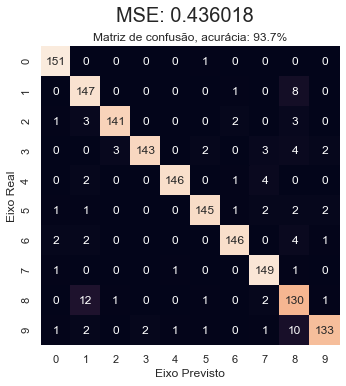

Wall time: 1.29 s


In [8]:
%%time
y_train_pred = perceptron.prever(x_train)
mse = perceptron.funcao_erro(x_train, y_train)
score = Scores(y_train, y_train_pred)
score.exibir_grafico("MSE: %f"%mse)

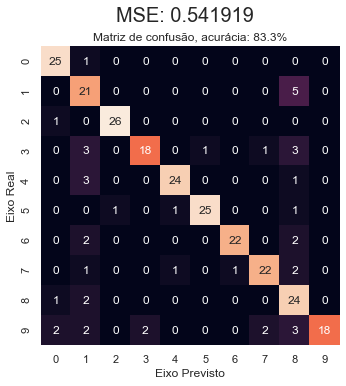

618 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
%%timeit -r 1 -n 1
y_pred = perceptron.prever(x_test)
mse = perceptron.funcao_erro(x_test, y_test)
score = Scores(y_test, y_pred)
score.exibir_grafico("MSE: %f"%mse)